# Chapter 6 Decision Trees 
## Training and Visualizing a Decision Tree 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
x = iris.data[:,2:]
y = iris.target 
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

One of many qualities of Decision Trees is that they require very little data preparation. In particular, they don't require feature scaling or centering at all. 

In [3]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5,1.5]])

array([1])

## The CART Training Algorithm

Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees. The cost function that the algorithm tries to minimize is given below: 
$$J(k,t_{k})=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$


### How to plot decision boundary for decision trees

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True,legend=False,plot_training=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape) 
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    if not iris: 
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    if plot_training: 
        plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label="Iris-Setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label="Iris-Versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],'g^',label="Iris-Virginica")
        plt.axis(axes) 
    if iris: 
        plt.xlabel("Petal length", fontsize=14) 
        plt.ylable("Petal width", fontsize=14) 
    else: 
        plt.xlabel(r"$x_1$",fontsize=18) 
        plt.ylabel(r"$x_2$",fontsize=18,rotation=0) 
    if legend: 
        plt.legend(loc="lower right",fontsize=14) 
        

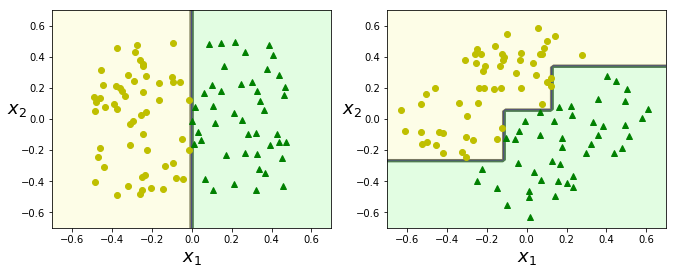

In [16]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6) 
Xs = np.random.rand(100,2) -0.5
ys = (Xs[:,0]>0).astype(np.float32) * 2

angle = np.pi/4 
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix) 

tree_clf_s = DecisionTreeClassifier(random_state = 42) 
tree_clf_s.fit(Xs,ys) 
tree_clf_sr = DecisionTreeClassifier(random_state=42) 
tree_clf_sr.fit(Xsr,ys) 

plt.figure(figsize=(11,4)) 
plt.subplot(121) 
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.subplot(122) 
plot_decision_boundary(tree_clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
